# Rede de co-autoria
A partir de dados reais extraídos da plataforma Scopus

Importação de bibliotecas

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd  # Biblioteca para manipulação de dados em forma de tabela (DataFrame)
import networkx as nx  # Biblioteca para criar e manipular grafos
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos estáticos
import plotly.graph_objects as go  # Biblioteca para criar gráficos interativos

## Passo 1 : Exportação de dados de arquivos CSV de alguma área específica
  - Nome dos autores
  - Identificadores únicos dos autores
  - Título do artigo
  - Ano de publicação


In [2]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('/content/nn_+_smart_control.csv')  # Lê o arquivo CSV e cria um DataFrame 'df'
print(df.head())  # Exibe as primeiras 5 linhas do DataFrame para conferir os dados

                                             Authors  \
0               Aguiar de Lima T.; Da Costa-Abreu M.   
1  da S. Medeiros D.R.; Torquato M.F.; Fernandes ...   
2  Vieira J.C.; Guedes L.A.; Santos M.R.; Sanchez...   
3  Flor D.; Pena D.; Pena L.; de Sousa V.A., Jr.;...   
4  Ribeiro V.; Greati V.; Bezerra A.; Silvano G.;...   

                                   Author full names  \
0  Aguiar de Lima, Thales (57192952811); Da Costa...   
1  da S. Medeiros, Denis R. (57845556200); Torqua...   
2  Vieira, Jusciaane Chacon (58781100000); Guedes...   
3  Flor, Daniel (57216582037); Pena, Danilo (5720...   
4  Ribeiro, Vinicius (57189895176); Greati, Vitor...   

                                        Author(s) ID  \
0                           57192952811; 14038905200   
1               57845556200; 57195314921; 7202947679   
2  58781100000; 35761038800; 57219689542; 5649554...   
3  57216582037; 57209855400; 57209848920; 6603844...   
4  57189895176; 57189887580; 57209738451; 5719

## Passo 2

- Criação da rede de co-autoria
 - Utilizando os dados, criar uma rede, contendo vértices (autores) e as arestas (colaboração entre eles).

In [3]:
# Cria um grafo vazio para representar a rede de co-autoria
G = nx.Graph()  # Cria um grafo não direcionado vazio

# Itera sobre cada linha do DataFrame (cada artigo)
for idx, row in df.iterrows():
    # Extrai a lista de autores do artigo, assumindo que os nomes estão separados por ponto e vírgula
    autores = row['Author full names'].split(';')
    # Adiciona uma aresta entre cada par de autores (representando a colaboração entre eles)
    for i in range(len(autores)):
        for j in range(i + 1, len(autores)):
            G.add_edge(autores[i], autores[j])  # Adiciona uma aresta entre os autores 'autores[i]' e 'autores[j]'

# Exibe algumas informações sobre o grafo de co-autoria
print(f"Número de nós: {G.number_of_nodes()}")  # Exibe o número de nós (autores) no grafo
print(f"Número de arestas: {G.number_of_edges()}")  # Exibe o número de arestas (colaborações) no grafo

Número de nós: 286
Número de arestas: 1000


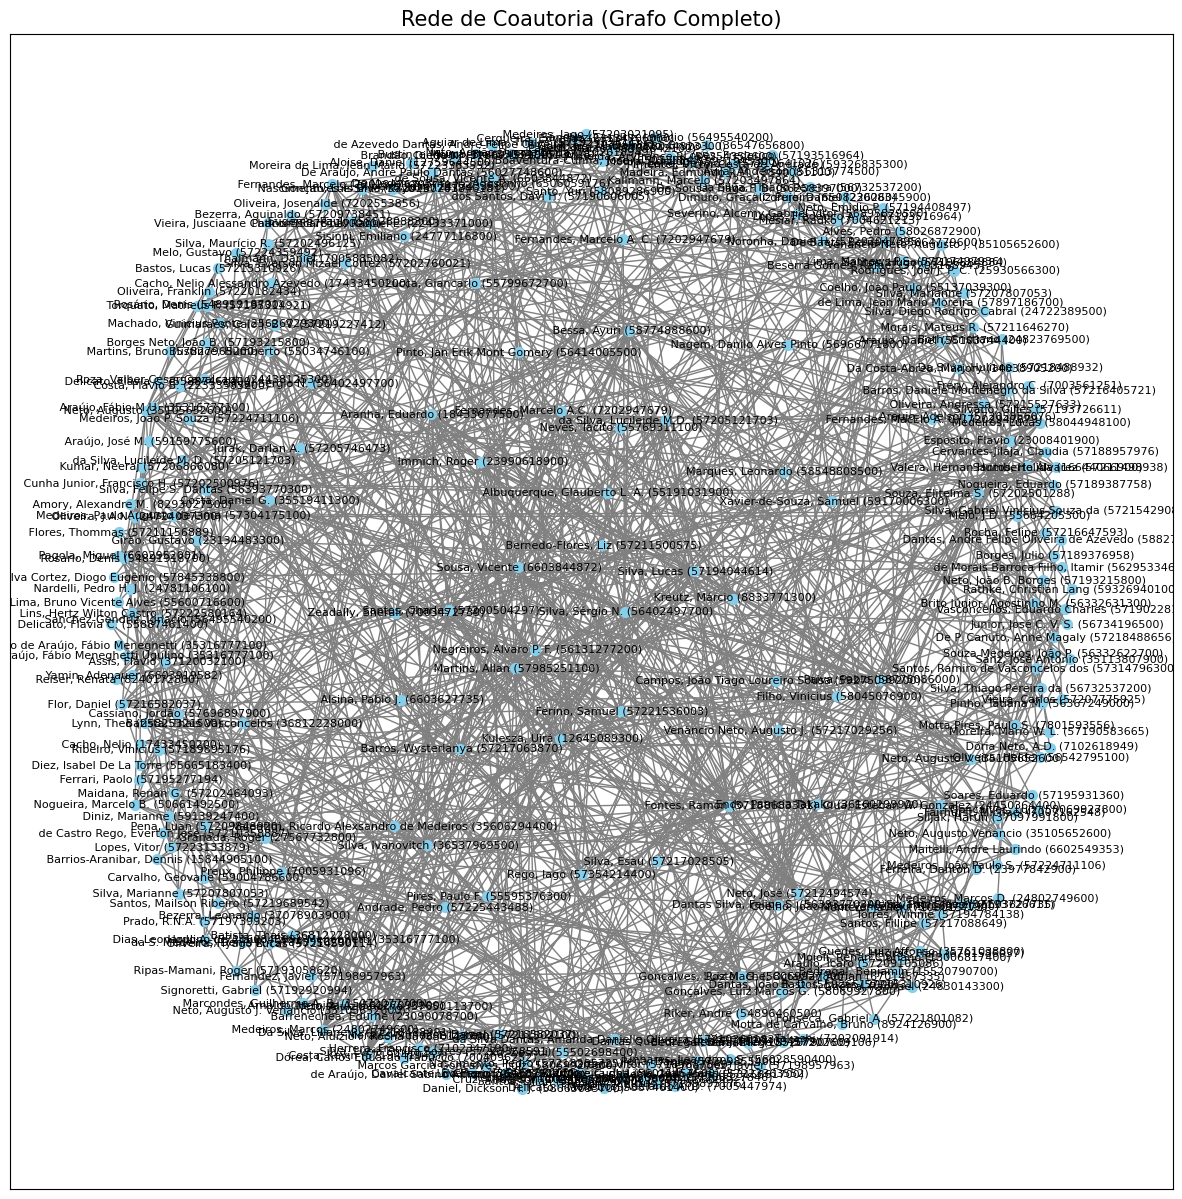

In [28]:
# Visualização estática simples do grafo completo
plt.figure(figsize=(15, 15))  # Define o tamanho da figura
pos = nx.spring_layout(G, seed=42, k=1.5)  # Define o layout do grafo (layout de mola)
nx.draw_networkx(G, pos, node_size=50, node_color='skyblue', edge_color='gray', font_size=8, with_labels=True)  # Desenha o grafo
plt.title('Rede de Coautoria (Grafo Completo)', size=15)  # Define o título do gráfico
plt.show()  # Exibe o gráfico estático

## Passo 3 : Análise na rede

 - Densidade da rede (mede o quão conectados estão os autores em relação ao número máximo possível de conexões).
 - Sub-grafo (Gerar sub-grafo contendo apenas os vértices que possuem pelo menos X vizinhos, **e calcular a densidade desse sub-grafo**)
 - Histograma dos graus (criar gráfico de histograma mostrando a distribuição do grau dos vértices da rede. Representa o número de co-autores com os quais ele colaborou.)

In [4]:
# Calcula a densidade do grafo de co-autoria
densidade = nx.density(G)  # Calcula a densidade da rede
print(f'Densidade da rede: {densidade}')  # Exibe a densidade do grafo

Densidade da rede: 0.0245368666421298


In [8]:
# Cria um subgrafo contendo apenas os nós com pelo menos X vizinhos
X = 15  # Define o número mínimo de vizinhos para um nó ser incluído no subgrafo
nodes_with_X_neighbors = [n for n in G.nodes() if G.degree(n) >= X]  # Lista dos nós que têm pelo menos 'X' vizinhos
sub_grafo = G.subgraph(nodes_with_X_neighbors)  # Cria um subgrafo contendo apenas os nós da lista

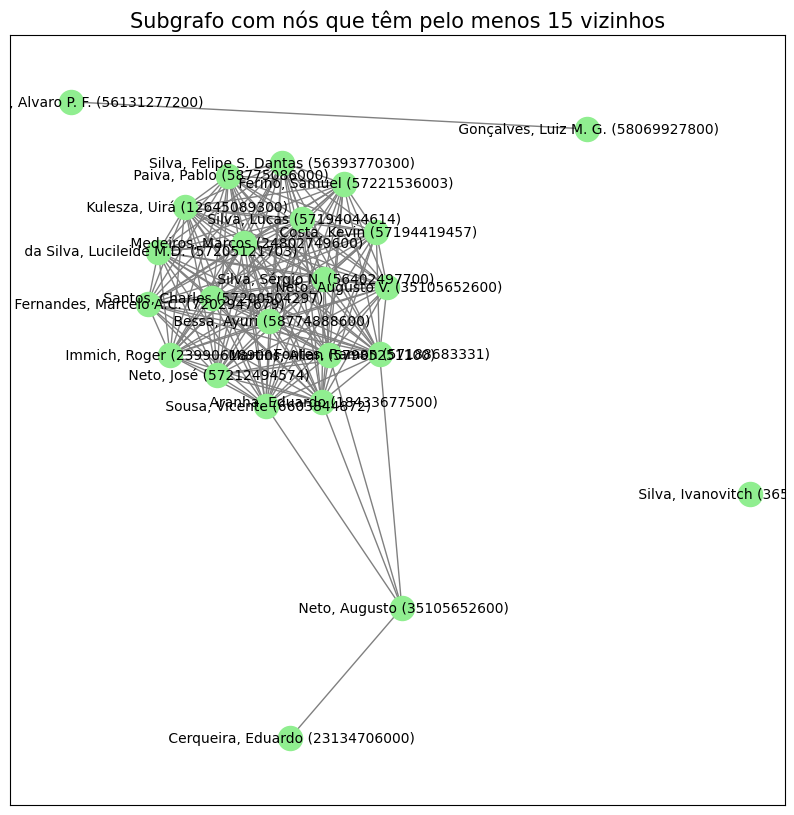

In [24]:
# Visualização estática simples do subgrafo

# Define o tamanho da figura
plt.figure(figsize=(10, 10))

# Define o layout do subgrafo
# G    : grafo que quer visualizar
# seed : reprodutividade do layout, utiliza cálculos aleatórios para definir a posição inicial dos vértices. Garante que a disposição dos vértics seja sempre a mesma, mesmo depois de executar várias vezes
# k    : quanto maior, mais afastados os vértices ficarão
pos_sub = nx.spring_layout(sub_grafo, seed=2, k=1)

# Desenha o subgrafo
nx.draw_networkx(sub_grafo, pos_sub, node_size=300, node_color='lightgreen', edge_color='gray', font_size=10, with_labels=True)

# Define o título do gráfico
plt.title(f'Subgrafo com nós que têm pelo menos {X} vizinhos', size=15)

# Exibe o gráfico estático
plt.show()

In [9]:
# Define a posição dos nós do subgrafo para visualização
pos = nx.spring_layout(sub_grafo)  # Calcula a posição dos nós usando o layout de mola

# Obtém as coordenadas das arestas do subgrafo para desenhar
edge_x = []
edge_y = []

# Itera sobre cada aresta do subgrafo para obter suas coordenadas
for edge in sub_grafo.edges():
    x0, y0 = pos[edge[0]]  # Coordenadas do nó inicial da aresta
    x1, y1 = pos[edge[1]]  # Coordenadas do nó final da aresta
    edge_x += [x0, x1, None]  # Adiciona as coordenadas 'x' da aresta (com None para quebrar a linha)
    edge_y += [y0, y1, None]  # Adiciona as coordenadas 'y' da aresta (com None para quebrar a linha)

# Cria o traço das arestas para o gráfico interativo
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color="#888"),  # Define a largura e a cor das arestas
    hoverinfo="none",  # Desabilita as informações de hover para as arestas
    mode="lines"  # Define que os traços devem ser desenhados como linhas
)

# Obtém as coordenadas dos nós do subgrafo para desenhar
node_x = [pos[node][0] for node in sub_grafo.nodes()]  # Coordenadas 'x' dos nós
node_y = [pos[node][1] for node in sub_grafo.nodes()]  # Coordenadas 'y' dos nós

# Cria o traço dos nós para o gráfico interativo
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode="markers+text",  # Define que os nós devem ser desenhados como marcadores com texto
    text=list(sub_grafo.nodes()),  # Define os textos dos nós (nome dos autores)
    textposition="bottom center",  # Posição do texto em relação ao nó
    hoverinfo="text",  # Informações exibidas ao passar o mouse sobre os nós
    marker=dict(
        showscale=False,  # Não exibe a escala de cores
        colorscale='YlGnBu',  # Define a escala de cores dos nós
        reversescale=True,  # Inverte a escala de cores
        color=[],  # Lista vazia para as cores dos nós
        size=10,  # Define o tamanho dos nós
        line=dict(width=2)  # Define a largura da linha ao redor dos nós
    )
)

# Layout do gráfico interativo do subgrafo
fig = go.Figure(
    data=[edge_trace, node_trace],  # Adiciona os traços das arestas e dos nós ao gráfico
    layout=go.Layout(
        title=f"Subgrafo com nós que têm pelo menos {X} vizinhos",  # Título do gráfico
        showlegend=False,  # Não exibe legenda
        hovermode='closest',  # Modo de hover ao passar o mouse
        margin=dict(b=20, l=5, r=5, t=40),  # Margens do gráfico
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),  # Configurações do eixo x
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)  # Configurações do eixo y
    )
)

# Exibe o gráfico interativo
fig.show()


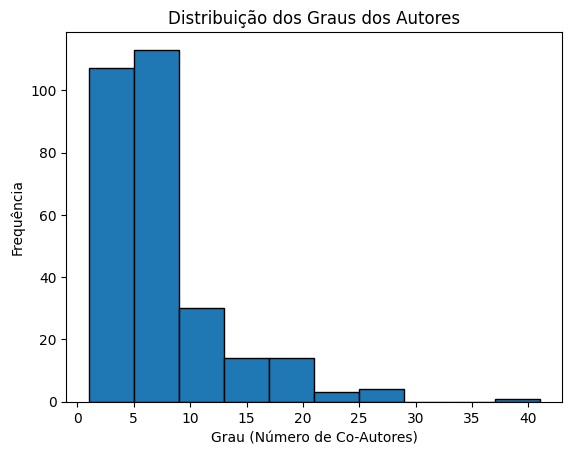

In [6]:
# HISTOGRAMA
# Criar o histograma dos graus dos nós no grafo original
graus = [G.degree(n) for n in G.nodes()]  # Obtém o grau de cada nó (número de coautores)

# Criar o histograma
plt.hist(graus, bins=10, edgecolor='black')  # Cria o histograma da distribuição dos graus
plt.title('Distribuição dos Graus dos Autores')  # Define o título do histograma
plt.xlabel('Grau (Número de Co-Autores)')  # Define o rótulo do eixo x
plt.ylabel('Frequência')  # Define o rótulo do eixo y
plt.show()  # Exibe o histograma

## Passo 4 : Entrega e Avaliação
-